In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
flowers_data = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Iris\Iris.csv', sep =",", encoding = "utf-8")

In [38]:
flowers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
flowers_data = flowers_data.drop("Id", axis = 1)
flowers_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

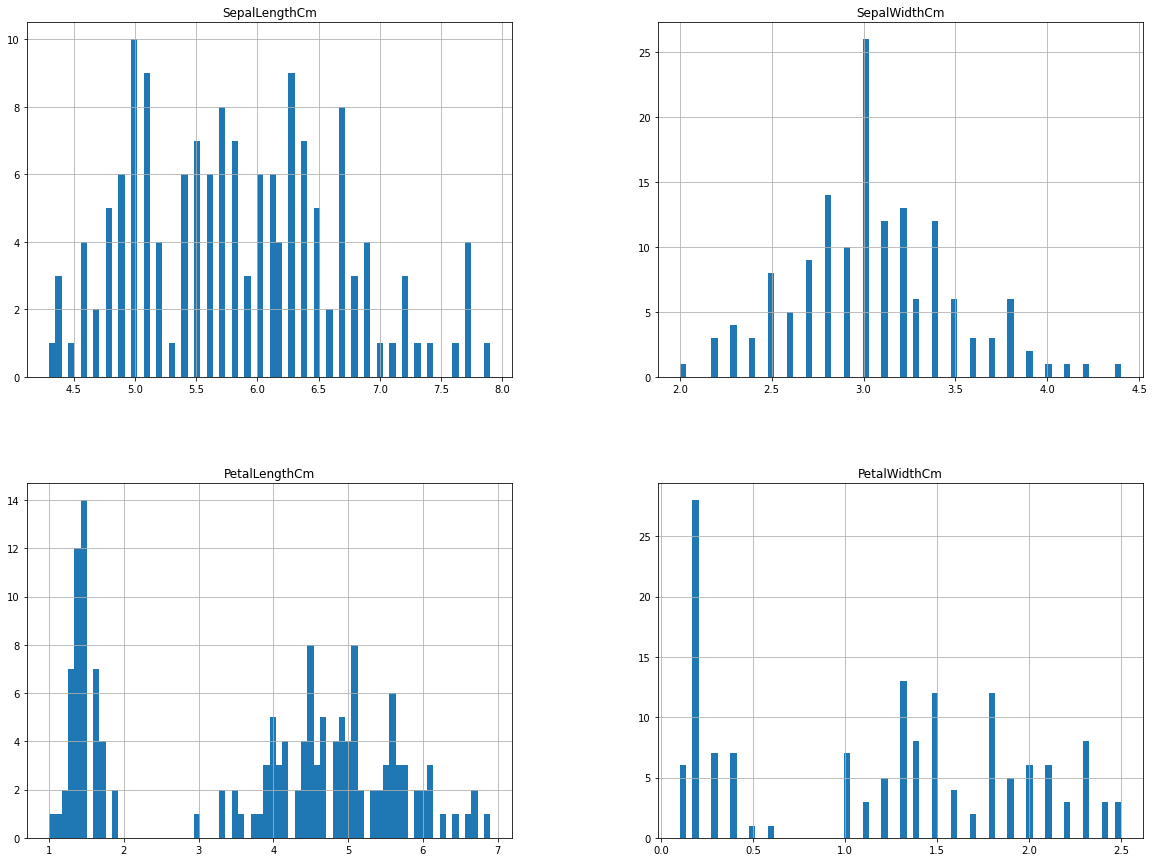

In [40]:
flowers_data.hist(bins=70, figsize=(20, 15))

<AxesSubplot:>

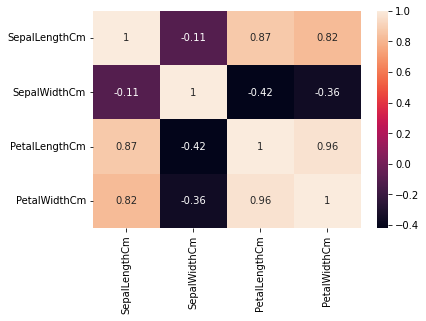

In [41]:
sns.heatmap(flowers_data.corr(),annot = True)

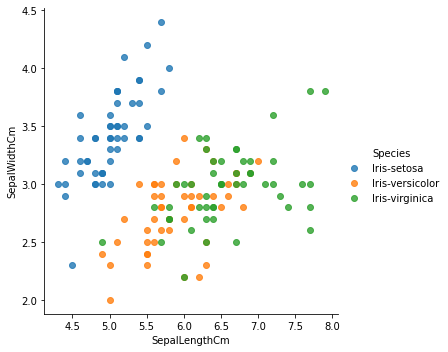

In [42]:
sns.lmplot( x="SepalLengthCm", y="SepalWidthCm", data= flowers_data, fit_reg=False, hue='Species', legend=True)

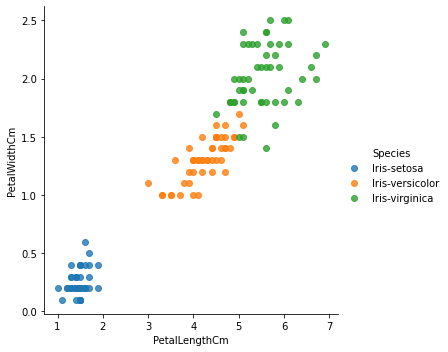

In [43]:
sns.lmplot( x="PetalLengthCm", y="PetalWidthCm", data= flowers_data, fit_reg=False, hue='Species', legend=True)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

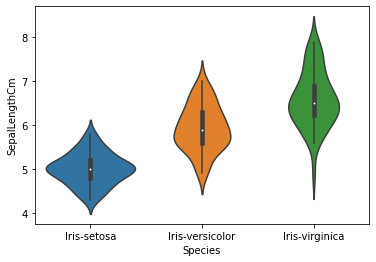

In [44]:
sns.violinplot(y = flowers_data["SepalLengthCm"], x = flowers_data["Species"])

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

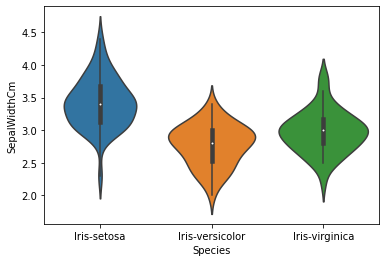

In [45]:
sns.violinplot(y = flowers_data["SepalWidthCm"], x = flowers_data["Species"])

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

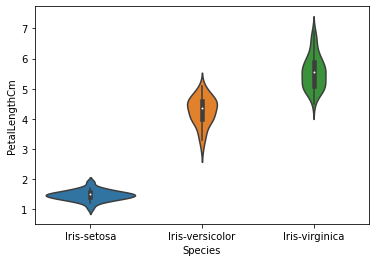

In [46]:
sns.violinplot(y = flowers_data["PetalLengthCm"], x = flowers_data["Species"])

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

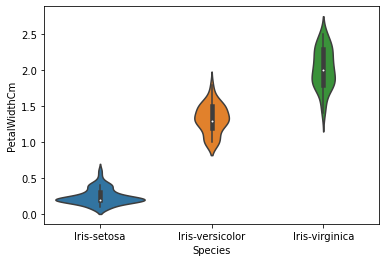

In [47]:
sns.violinplot(y = flowers_data["PetalWidthCm"], x = flowers_data["Species"])

In [48]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(flowers_data, test_size = 0.2,random_state = 42)

In [49]:
train_set_labels = train_set["Species"].copy()
train_set = train_set.drop("Species", axis = 1)
test_set_labels = test_set["Species"].copy()
test_set = test_set.drop("Species", axis = 1)

In [50]:
from sklearn.preprocessing import MinMaxScaler as Scaler
scaler = Scaler()
scaler.fit(train_set)
scaled_train_set = scaler.transform(train_set)
scaled_test_set = scaler.transform(test_set)

In [51]:
scaled_df = pd.DataFrame(data = scaled_train_set)
scaled_df

,0,1,2,3
0,0.088235,0.666667,0.000000,0.041667
1,0.411765,1.000000,0.087719,0.125000
2,0.705882,0.458333,0.596491,0.541667
3,0.147059,0.583333,0.105263,0.041667
4,0.029412,0.500000,0.052632,0.041667
...,...,...,...,...
115,0.529412,0.333333,0.526316,0.500000
116,0.176471,0.208333,0.614035,0.666667
117,0.441176,0.833333,0.035088,0.041667
118,0.441176,0.250000,0.526316,0.458333


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.tree import DecisionTreeClassifier

In [53]:
from sklearn import model_selection

In [54]:
models = []
models.append(("LogReg", LogisticRegression()))
models.append(("RanFor", RandomForestClassifier()))
models.append(("DecTree", DecisionTreeClassifier()))

In [55]:
seed = 7
results = []
names = []
X = scaled_train_set
Y = train_set_labels

In [56]:
for name, model in models:
    kfolds = model_selection.KFold(n_splits=10)
    cv_results  = model_selection.cross_val_score(model, X, Y, cv=kfolds, scoring="accuracy")
    results.append(cv_results)
    names.append(name)

    outcome = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(outcome)

LogReg: 0.916667 (0.074536)
RanFor: 0.950000 (0.066667)
DecTree: 0.925000 (0.058333)


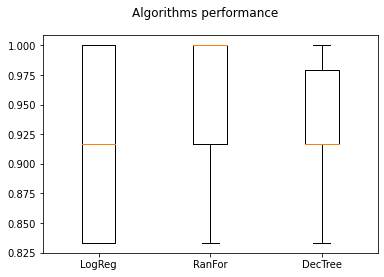

In [57]:
figure = plt.figure()
figure.suptitle("Algorithms performance")
ax = figure.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()